### 관련 자료들 불러서 설치하기

In [18]:
# !pip install pandas
# !pip install konlpy
# 설치이슈관련 사이트 https://blog.naver.com/sgs03091/221448657179   https://ellun.tistory.com/46
# !pip install matplotlib  ## JAVA HOME 파이썬 지정  
# !pip install wordcloud
import pandas as pd
from collections import Counter
from konlpy.tag import Kkma
from wordcloud import WordCloud
%matplotlib inline
import matplotlib.pyplot as plt

In [19]:
#https://ellun.tistory.com/46
# !pip install JPype1
Kkma=Kkma()

### 데이터 읽기 및 확인 

In [25]:
#!pip install xlrd
Data=pd.read_excel("./190806_creativity_sum.xlsx")

In [26]:
Data.head()

,description
0,MBTI와 창의성에 대하여 ※ 주의 : 슬픈 진실이 포함되어 있습니다. ※ 이로인해...
1,종치면 들어가서 교육받고 종치면 나오고...초중고품아가 아이들 창의성에 어떤 영향을...
2,https://youtu.be/FTrfq4cU8LM 원장님 지난번 '창의성'관련 라...
3,"개인거래(판매), 판매중, 가격 9,999원, 직접거래, 호기심백과큐 언어창의성 자..."
4,"개인거래(판매), 판매중, 가격 2,000원, 직접거래, 독일 창의성 놀이 교육 성..."


In [27]:
Data_high_score=Data
Data_high_score=Data_high_score.reset_index(drop=True)
Data_high_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6942 entries, 0 to 6941
Data columns (total 1 columns):
description    6942 non-null object
dtypes: object(1)
memory usage: 54.3+ KB


### centrality 뽑아내기 & stopword 수정 - 아래 시간 걸림 

In [28]:
#########잡아라 텍스트 마이닝 with파이선 책 129p

from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer("[\w]+")

#아래 stop_words를 수정해가면서 진행 
stop_words=["이로", "저희", "있는", "기반으로", "이승헌", "뇌교육의", "위한", 
            "있다", "통해", "뇌를", "우리", "BR뇌교육", "대한", "엘살바도르",
           "안녕하세요", "하는", "com", "하고", "IBREA","많이"]

count={}
for line in Data['description']:
    #words=line.lower()
    tokens=tokenizer.tokenize(line)
    stopped_tokens=[i for i in list(set(tokens)) if not i in stop_words+["br"]]
    stopped_tokens2=[i for i in stopped_tokens if len(i)>1]
    for i, a in enumerate(stopped_tokens2):
        for b in stopped_tokens2[i+1:]:
            if a>b:
                count[b, a]=count.get((b, a),0)+1
            else :
                count[a, b]=count.get((a, b),0)+1
df=pd.DataFrame.from_dict(count, orient='index')

list1=[]
for i in range(len(df)):
    list1.append([df.index[i][0],df.index[i][1],df[0][i]])

In [29]:
df2=pd.DataFrame(list1,columns=["term1","term2","freq"])
df3=df2.sort_values(by=["freq"],ascending=False)
df3_pos=df3.reset_index(drop=True)
df3_pos.head()

,term1,term2,freq
0,창의성,창의성을,324
1,교육,창의성,192
2,창의성,창의성의,187
3,창의성,창의성이,185
4,창의성,창의성은,184


In [30]:
import networkx as nx
import operator

import numpy as np
G_pos=nx.Graph()

for i in range((len(np.where(df3_pos['freq']>10)[0]))):
    G_pos.add_edge(df3_pos['term1'][i], df3_pos['term2'][i], weight=int(df3_pos['freq'][i]))

dgr = nx.degree_centrality(G_pos)
btw = nx.betweenness_centrality(G_pos)
cls = nx.closeness_centrality(G_pos)
egv = nx.eigenvector_centrality(G_pos)

sorted_dgr = sorted(dgr.items(), key=operator.itemgetter(1), reverse=True)
sorted_btw = sorted(btw.items(), key=operator.itemgetter(1), reverse=True)
sorted_cls = sorted(cls.items(), key=operator.itemgetter(1), reverse=True)
sorted_egv = sorted(egv.items(), key=operator.itemgetter(1), reverse=True)

print("** degree **")
for x in range(10):
    print(sorted_dgr[x])

print("** betweenness **")
for x in range(10):
    print(sorted_btw[x])

print("** closeness **")
for x in range(10):
    print(sorted_cls[x])

print("** eigenvector **")
for x in range(10):
    print(sorted_egv[x])

** degree **
('창의성', 0.8055290753098189)
('창의성을', 0.3898951382268827)
('창의성이', 0.1553860819828408)
('창의성은', 0.11534795042897998)
('창의성의', 0.09151572926596759)
('새로운', 0.08674928503336511)
('창의성과', 0.07912297426120114)
('창의적인', 0.07530981887511916)
('것을', 0.06196377502383222)
('등을', 0.06005719733079123)
** betweenness **
('창의성', 0.7955949843515207)
('창의성을', 0.2075033800673356)
('창의성이', 0.02966501363050712)
('창의성과', 0.02125386784890683)
('창의성은', 0.017036610511447538)
('창의성의', 0.016138790204776876)
('새로운', 0.014955041177438368)
('바탕으로', 0.00935261538748925)
('교원', 0.007547089541555088)
('등을', 0.007171942267175363)
** closeness **
('창의성', 0.8346675823924808)
('창의성을', 0.6100430899914687)
('창의성이', 0.5312678257017722)
('창의성은', 0.51912757732508)
('창의성의', 0.513515387299944)
('새로운', 0.5107545518843529)
('창의성과', 0.5097579576367737)
('창의적인', 0.5087652449636738)
('것을', 0.5038591191684599)
('위해', 0.5026473367750774)
** eigenvector **
('창의성', 0.47590648855845497)
('창의성을', 0.299074493712536)
('창의성이', 

### 네트워크 그리기 - 에러 

/Users/spark/miniconda3/envs/study37/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/spark/miniconda3/envs/study37/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52285 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/spark/miniconda3/envs/study37/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/spark/miniconda3/envs/study37/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/spark/miniconda3/envs/study37/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 52285 missing f

/Users/spark/miniconda3/envs/study37/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 50669 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/spark/miniconda3/envs/study37/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49910 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/spark/miniconda3/envs/study37/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 49910 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/spark/miniconda3/envs/study37/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/spark/miniconda3/envs/study37/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/spark/minicond

/Users/spark/miniconda3/envs/study37/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/spark/miniconda3/envs/study37/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 45785 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/spark/miniconda3/envs/study37/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48276 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/spark/miniconda3/envs/study37/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 48276 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/spark/miniconda3/envs/study37/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44160 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/spark/minico

/Users/spark/miniconda3/envs/study37/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 50752 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/spark/miniconda3/envs/study37/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/spark/miniconda3/envs/study37/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/spark/miniconda3/envs/study37/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53441 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/spark/miniconda3/envs/study37/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47549 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/spark/minico

/Users/spark/miniconda3/envs/study37/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47161 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/spark/miniconda3/envs/study37/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 47161 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/spark/miniconda3/envs/study37/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53664 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/spark/miniconda3/envs/study37/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 53664 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/spark/miniconda3/envs/study37/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48316 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/spark/minico

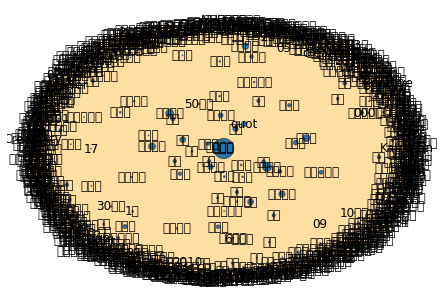

In [31]:
G = nx.Graph()

for i in range(len(sorted_cls)):
    G.add_node(sorted_cls[i][0], nodesize=sorted_dgr[i][1])

for i in range((len(np.where(df3_pos['freq']>10)[0]))):
    G.add_weighted_edges_from([(df3_pos['term1'][i], df3_pos['term2'][i],int(df3_pos['freq'][i]))])

sizes = [G.node[node]['nodesize']*500 for node in G]

options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}

nx.draw(G, node_size=sizes, pos=nx.spring_layout(G, k=3.5, iterations=50), **options)
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555") 
plt.show()

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
f_path = "/Library/Fonts/AppleGothic.ttf"
#윈도우면 -> f_path = "c:/Windown/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)


###네트워크 그리는 138p코드인데 글자가 에러나는듯 

## 명사추출 

In [32]:
#명사추출-짱 시간걸림 
high_score_reviews=[]
for i in range(len(Data_high_score)):
    try:
        high_score_reviews.append(Kkma.nouns(Data_high_score["description"][i]))
    except Exception as e:
            continue

high_score_reviews[1:2]

[['종',
  '교육',
  '중고품',
  '중고품아가',
  '아가',
  '아이',
  '창의성',
  '영향',
  '안전',
  '편리성',
  '아파트',
  '하나',
  '생각',
  '저',
  '적',
  '학교',
  '때',
  '학교안',
  '안']]

In [33]:
def flatten(l):
    flatList=[]
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList

In [34]:
high_score_reviews=flatten(high_score_reviews)
high_score_reviews=[x for x in high_score_reviews if len(x)>1]
high_score_reviews=[x for x in high_score_reviews if not x.isdigit()]
# 상위 50개 단어 frequency 뽑기 
pd.Series(high_score_reviews).value_counts().head(50)

창의성     5543
창의      2366
교육      1140
생각       819
아이       742
성과       633
사람       586
우리       573
창의력      545
능력       470
성은       454
창의성은     408
방법       395
학생       388
성의       388
아이디어     374
필요       372
문제       370
무엇       359
가지       328
학교       326
다양       323
중요       318
사고       305
연구       303
개발       286
과정       280
과학       276
개인       271
프로그램     267
창의성과     266
관련       249
발휘       245
주제       244
사회       242
활동       238
평가       235
이야기      234
내용       233
미래       232
자신       228
시대       226
그림       221
유아       219
시간       217
언어       216
놀이       216
때문       216
이번       216
인재       215
dtype: int64

In [35]:
def __array__(self):
    """Convert to numpy array.
    Returns 
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return self.to_array()

def to_array(self):
    return np.array(self.to_image())

#윈도우용
#font_path = 'C:/Windows/Fonts/malgun.ttf'

font_path="/Library/Fonts/AppleGothic.ttf"

In [43]:
wordcloud=WordCloud(font_path=font_path, width=800, height=800, 
                    background_color="white", colormap="Set2")

In [44]:
wordcloud=wordcloud.generate_from_frequencies(Counter(high_score_reviews))
array=wordcloud.to_array()

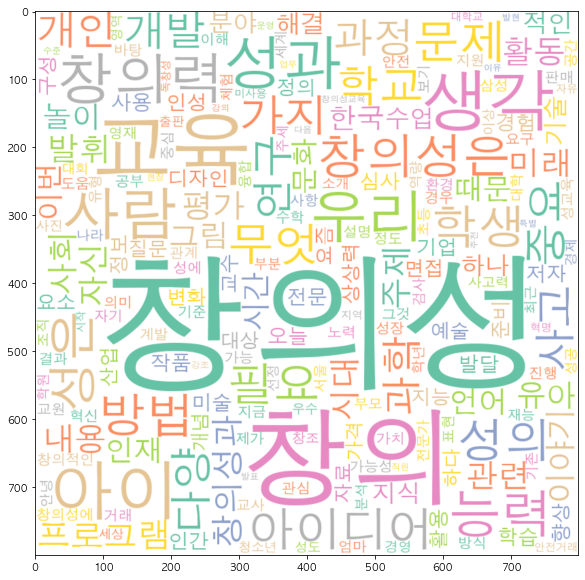

In [45]:
fig=plt.figure(figsize=(10,10))
plt.imshow(array, interpolation="bilinear")
plt.show()

### 특정 단어가 있는 문장 확인하기 

In [75]:
# 특정 단어가 있는 문장 확인하기 
[x for x in Data_high_score['description'] if "시기" in x]

['창의성 영재교육 키즈닥터 송파원7세되니 주변친구들은 학원도 많이 다니던데, 사실 우리아이는 축구랑... 높은창의성, 평균이상의 두뇌, 뛰어난 과제 집착력입니다.키즈닥터는 두뇌가 활성화되는 시기 4세~11세 아동에게... ',
 '판매물품 : 교원 언어창의성 1,2 2. 구입시기 : 2017년도 3. 판매가격 : 15000원 4. 아파트명/단지 : 가재마을4단지 5. 배송방법 : 수령해 주세요~ 6. 제품설명/물품사진 : 교원 단행본으로 유명한 언어창의성 1,2입니다. 내용 예쁘고... ',
 '1. 마술피리꼬마 양장본 39권 (5천) 빛바램있지만 안에 상태좋아요. 가격내림 2. (완료) 교원 올스토리 언어창의성동화 10권 (5천) 가볍게 읽히시기 좋아요. 상태좋아요. ',
 '둘째아이가 퍼포먼스 미술학원 다니는데요 색감이좋다 잘한다는 말은 평소에도 들었는데 이번에는 따로 말씀하시기를 또래아이들이 일반적으로 그리는 방식으로 아니라 독창적이면서 창의성이 뛰어나다네요 큰아이도... ',
 '타고남을 노력으로 잡을 순 없다지만,창의성! 노력으로 가능할까요? 기획과 마케팅의 고수가 되는 날까지 화이팅입니다~ 트렌드헌터 내 홍보글은 홍보게시판(바로가기 클릭) 을 이용해주시기 바랍니다.기타 구인구직... ',
 '제 딸은 39개월 인데요 그림 그리라고 하면 창의성이 없는지 거의 손을 못대요~ 그냥 동그라미나 일자 그리는 수준? 이 시기에 다른 아이들은 어떤지 공유할수 있을까요?^^;; 첨부한 사진은 저를 그린건데 엄마 예쁘게... ',
 '언어창의성1.아덴아나이스블랭킷담요, 1번.스텝2책상-이케아마뮤트의자:2만원 사용감 조금 있어요 책상다리 접을수있어서 가져가시기 편해요 2번.교원소전집책 ㅡㅡ2만5천원 언어창의성은 창의력을 키워주기에 좋은... ',
 '성장 후에도 창의성을 유지하도록 하려면 유아기에 창의성 개발을 잘 해 주어야 한다고 하며, 이 시기가 창의성 개발의 결정적 시기라고 합니다. 그럼 왜?? 창의성을 길러야 할까요?? 창의성은 “새롭다”라는 개념이... '

## 토픽 모델링 - 바로 아래 코드 시간걸림 

In [47]:
#!pip install gensim
from gensim import corpora, models
import gensim

###시간걸림 
high_score_reviews=[]
for i in range(len(Data_high_score)):
    try:
        high_score_reviews.append(Kkma.nouns(Data_high_score["description"][i]))
    except Exception as e:
        continue
        

In [48]:
high_score_reviews=[[y for y in x if not len(y)==1] 
                    for x in high_score_reviews]
dictionary=corpora.Dictionary(high_score_reviews)
corpus=[dictionary.doc2bow(text) for text in high_score_reviews]

### 갯수 선정(perplexity) - 바로 아래 코드 시간걸림  

In [49]:
import matplotlib.pyplot as plt
perplexity_values=[]
for i in range(2,15):
    ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

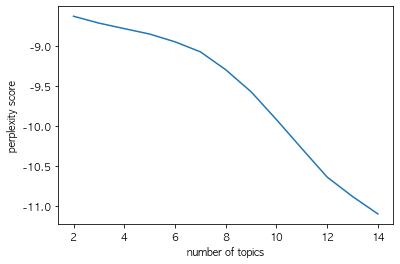

In [50]:
x=range(2,15)
plt.plot(x, perplexity_values)
plt.xlabel("number of topics")
plt.ylabel("perplexity score")
plt.show()

### 갯수선정(coherence) - 바로 아래코드 시간 걸림 

In [51]:
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

coherence_values=[]
for i in range(2,15):
    ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model_lda=CoherenceModel(model=ldamodel, texts=high_score_reviews, dictionary=dictionary,topn=10)
    coherence_lda=coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)



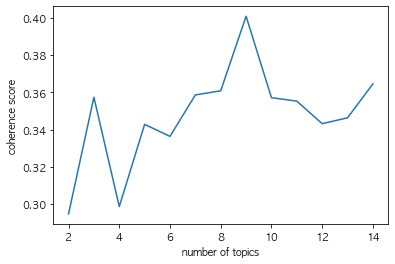

In [52]:
x=range(2,15)
plt.plot(x, coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()

### 특정 토픽 갯수에 대한 모델 만들어 내기 - 아래 num_topics 갯수 수정

In [53]:
# 위의 결과들 바탕으로 갯수 수정하기 
ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=9, 
                                         id2word=dictionary)

In [54]:
ldamodel.print_topics(num_words=15)

[(0,
  '0.051*"창의성" + 0.019*"창의" + 0.012*"사람" + 0.011*"생각" + 0.009*"39" + 0.008*"아이" + 0.006*"능력" + 0.006*"자신" + 0.006*"창의력" + 0.005*"표현" + 0.004*"교육" + 0.004*"우리" + 0.004*"이야기" + 0.004*"미적" + 0.004*"방법"'),
 (1,
  '0.042*"창의성" + 0.020*"창의" + 0.009*"무엇" + 0.009*"사람" + 0.009*"생각" + 0.007*"성은" + 0.006*"우리" + 0.006*"창의성은" + 0.006*"성의" + 0.005*"인간" + 0.005*"서명" + 0.005*"성과" + 0.005*"교육" + 0.004*"지능" + 0.004*"아이디어"'),
 (2,
  '0.030*"창의성" + 0.010*"저자" + 0.008*"사항" + 0.007*"시대" + 0.007*"산업" + 0.006*"유형" + 0.006*"혁명" + 0.006*"개인" + 0.006*"교육" + 0.006*"보기" + 0.005*"자료" + 0.005*"단행본" + 0.005*"창의" + 0.005*"필요하다" + 0.005*"출판"'),
 (3,
  '0.048*"창의성" + 0.021*"창의" + 0.009*"교육" + 0.008*"생각" + 0.007*"성과" + 0.007*"사람" + 0.006*"아이" + 0.005*"디자인" + 0.005*"우리" + 0.005*"가지" + 0.005*"다양" + 0.005*"관련" + 0.004*"연구" + 0.004*"필요" + 0.004*"그림"'),
 (4,
  '0.040*"창의성" + 0.033*"창의" + 0.013*"능력" + 0.011*"교육" + 0.010*"성과" + 0.009*"사고" + 0.008*"방법" + 0.008*"심사" + 0.008*"때문" + 0.008*"성은" + 0.007*"적인" + 0.007*"생각" + 0.007

# 토픽- 시각화 - 앞에 돌린 숫자대로 됨 - 시간 매우 걸림 

In [55]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
vis

/Users/spark/miniconda3/envs/study37/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.070925 -0.007304       1        1  17.737146
8      0.063504  0.049109       2        1  14.944042
4      0.088152 -0.017942       3        1  13.815472
0      0.059530 -0.062709       4        1  12.695129
6     -0.000288  0.185934       5        1  10.051139
1     -0.012582 -0.072517       6        1   9.863270
5      0.028157 -0.052095       7        1   9.759531
2     -0.150083 -0.003932       8        1   7.673857
7     -0.147315 -0.018544       9        1   3.460409, topic_info=      Category         Freq  Term        Total  loglift  logprob
922    Default   379.000000    39   379.000000  30.0000  30.0000
728    Default   796.000000    성과   796.000000  29.0000  29.0000
3629   Default   140.000000    심사   140.000000  28.0000  28.0000
145    Default   171.000000    저자   171.000000  27.0000  27.0000
12     Default   905.000000    생각   905.000000  26.0000  26.0000
984    Default   129.000000    사항   129.000000  25.0000  25.0000
8      Default  2313.000000    창의  2313.000000  24.0000  24.0000
429    Default   351.000000    무엇   351.000000  23.0000  23.0000
831    Default   623.000000    능력   623.000000  22.0000  22.0000
417    Default   379.000000    성은   379.000000  21.0000  21.0000
1398   Default   193.000000    산업   193.000000  20.0000  20.0000
8069   Default    67.000000    서명    67.000000  19.0000  19.0000
30     Default   636.000000    우리   636.000000  18.0000  18.0000
521    Default   223.000000    인성   223.000000  17.0000  17.0000
433    Default   101.000000    유형   101.000000  16.0000  16.0000
419    Default   345.000000  창의성은   345.000000  15.0000  15.0000
1462   Default   111.000000    혁명   111.000000  14.0000  14.0000
1200   Default   405.000000    학생   405.000000  13.0000  13.0000
1767   Default    40.000000    직장    40.000000  12.0000  12.0000
1906   Default   208.000000    전문   208.000000  11.0000  11.0000
93     Default   221.000000    적인   221.000000  10.0000  10.0000
555    Default    53.000000   단행본    53.000000   9.0000   9.0000
907    Default   122.000000    보기   122.000000   8.0000   8.0000
4944   Default    65.000000    미적    65.000000   7.0000   7.0000
155    Default   346.000000  아이디어   346.000000   6.0000   6.0000
1243   Default   254.000000    시대   254.000000   5.0000   5.0000
9      Default  5392.000000   창의성  5392.000000   4.0000   4.0000
152    Default   319.000000    때문   319.000000   3.0000   3.0000
2807   Default    57.000000  필요하다    57.000000   2.0000   2.0000
174    Default   236.000000    10   236.000000   1.0000   1.0000
...        ...          ...   ...          ...      ...      ...
8459    Topic9     7.248466    기조     8.330043   3.2247  -6.4270
3013    Topic9     6.409147    품질     7.383726   3.2222  -6.5501
6335    Topic9     6.003147  미래인재     6.977382   3.2134  -6.6155
1502    Topic9     5.905530    마이     6.881413   3.2108  -6.6319
11481   Topic9     7.047902    라면     8.228210   3.2089  -6.4551
7462    Topic9     5.876326    풍토     6.874369   3.2069  -6.6369
5313    Topic9     8.030378    저의     9.426557   3.2035  -6.3246
8461    Topic9     7.290136   뇌교육     8.643765   3.1935  -6.4213
3748    Topic9     5.480073    메뉴     6.533246   3.1880  -6.7067
4884    Topic9     5.921862   10명     7.147329   3.1757  -6.6291
7023    Topic9    15.162925    독자    21.728205   3.0040  -5.6889
2176    Topic9    13.496989    소설    19.878866   2.9766  -5.8053
792     Topic9     9.103833    상자    13.316235   2.9835  -6.1991
3949    Topic9    16.269518    의도    33.190136   2.6508  -5.6185
6758    Topic9    13.193111    복잡    25.201748   2.7166  -5.8281
3049    Topic9    13.876166    최대    28.369087   2.6487  -5.7776
972     Topic9    14.427805   완성도    32.188179   2.5613  -5.7386
5583    Topic9    11.935983   일상적    27.033857   2.5463  -5.9282
9       Topic9    94.141068   창의성  5392.635254  -0.6842  -3.8630
174     Topic9    25.588240    10   236.294235  

### 문장과 토픽별 설명정도 확인 - 
### 문장 순서(숫자) 바꿔가면서 토픽 잘 설명하는 문장 확인 

In [73]:
ldamodel.get_document_topics(corpus)[100]
#몇번째[#]의 문장이 아래 나오는 결과(토픽별 설명정도)를 몇%정도 설명하는지를 나타냄 

[(2, 0.12678678), (3, 0.7826248), (5, 0.05671015)]

In [57]:
ldamodel.get_document_topics(corpus)[1]

[(5, 0.94020313)]

In [58]:
ldamodel.get_document_topics(corpus)[5]

[(3, 0.758741), (5, 0.19258007)]

In [59]:
ldamodel.get_document_topics(corpus)[10]

[(0, 0.95743567)]

In [60]:
ldamodel.get_document_topics(corpus)[3848]

[(3, 0.61801076), (8, 0.32696363)]

### 문장 찾았으면 아래에서 진짜 문장 확인 

In [74]:
Data_high_score["description"][100]

"아무런 자원이 없는 '창의성'이 가능하던가.독서는 나의 자원이다. 아무도 빼앗을 수 없는 나만의 자원 #상담학개론(완독)#상당연구방법론(거의 다 읽음)#우리가 살아있는 모든 순간(완독)#EBS 자본주의#성경 욥기(매일... "

In [62]:
Data_high_score["description"][5]

'공부도거의 안하고 싫어하는아이 독창성 창의성길러주고싶은데 미술이든 창작활동이든 아이라 평범한 엄마가 같이 즐기고 할수있는 활동있을까요 미취학 자녀나 교육과 무관한 내용, 게시판 성격에 맞지 않는 글은... '

In [63]:
Data_high_score["description"][3848]

'과학 활동을 통한 유아의 창의적 사고력 증진 프로그램 개 발 연구 (2000) 김온기 가정학 0회 피인용 7. (1989). 창의성을 흔들어 깨워라. 토탈디자인 김재은, 주희정 8. 右腦... '

# 연관어 분석 

In [64]:
from gensim.models.word2vec import Word2Vec
model=Word2Vec(high_score_reviews, sg=1, window=10, min_count=1)

In [38]:
#http://blog.daum.net/to302/84
#c extention이 없어서 training이 느리다는 에러창에 대해서 
# 결국, python 패키지 사이트에서 이미 만들어진 패키지를 받아서 설치하고 확인하니 '0' 이 나옴. 
#!pip install gensim-3.5.0-cp37-cp37m-win_amd64.whl
# https://www.lfd.uci.edu/~gohlke/pythonlibs/
# gensim-3.8.0-cp35-cp35m-win_amd64.whl
# !pip install gensim-3.8.0-cp35-cp35m-win_amd64.whl
# https://radimrehurek.com/gensim/install.html
# !pip install --upgrade gensim


In [69]:
model.init_sims(replace=True)
model.wv.most_similar("창의성",topn=50)

[('서로', 0.8703004121780396),
 ('구체적', 0.8694232106208801),
 ('시기', 0.867728590965271),
 ('이미지', 0.8667801022529602),
 ('성품', 0.866742730140686),
 ('성도', 0.8666507601737976),
 ('입장', 0.8663588166236877),
 ('역할', 0.865835964679718),
 ('양육', 0.8656330108642578),
 ('기억', 0.8647354245185852),
 ('대답', 0.864296555519104),
 ('생활', 0.8641219735145569),
 ('인생', 0.8637517690658569),
 ('나름', 0.863577127456665),
 ('우뇌', 0.863398015499115),
 ('두뇌', 0.8629326820373535),
 ('주의', 0.8626623749732971),
 ('무엇인가', 0.8626506924629211),
 ('대로', 0.8625896573066711),
 ('느낌', 0.8622591495513916),
 ('재료', 0.8621941804885864),
 ('실력', 0.8621616959571838),
 ('시도', 0.861484169960022),
 ('효과적', 0.8614802360534668),
 ('인가', 0.8609011173248291),
 ('제시', 0.8603987097740173),
 ('직장', 0.8603212237358093),
 ('다음', 0.8602779507637024),
 ('실천', 0.8602768182754517),
 ('정확', 0.8602760434150696),
 ('창조적', 0.8601853847503662),
 ('암기', 0.859809160232544),
 ('말씀', 0.8596813082695007),
 ('대화', 0.8596642017364502),
 ('거기', 0.859533

In [76]:
model.wv.similarity("창의성", "인성")

0.67264307